In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from financepy.models.black import *
from financepy.utils.global_types import *

####################################################################
#  FINANCEPY BETA Version 0.370 - This build: 28 Oct 2024 at 20:26 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



### Call Spread

<Axes: title={'center': 'Call Spread Delta and Vega'}, xlabel='Spot Price'>

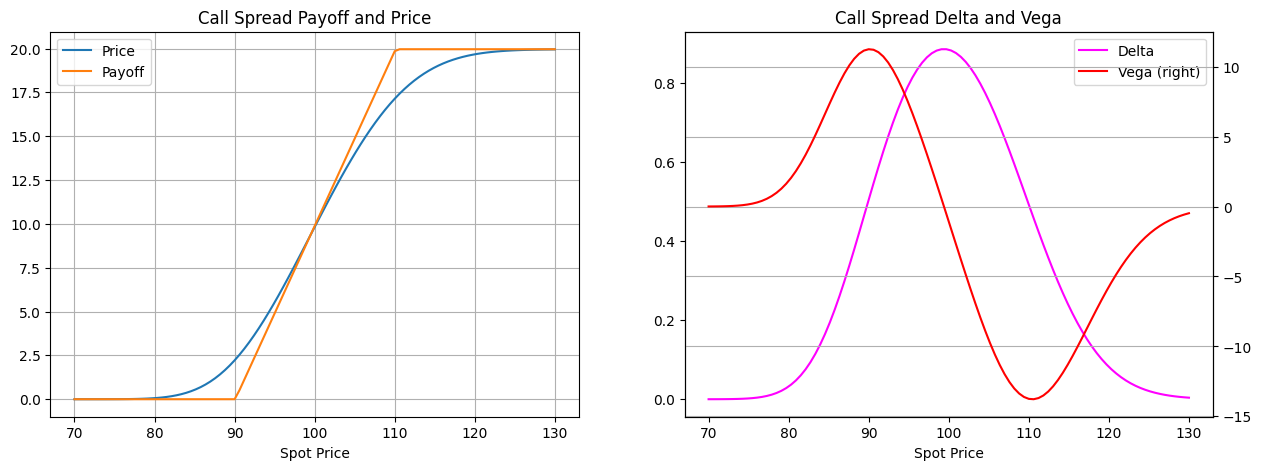

In [2]:
K1 = 90
K2 = 110
q = 0.03
r = 0.02
ivol = 0.20
model = Black(ivol)
T = 0.1
DF = np.exp(-r*T)
DivF = np.exp(-q*T)
spots = np.linspace(70,130,100)
forwards = [s*DivF/DF for s in spots]
#--------------------------------------------------------------------------------------
payoff1 = [model.value(f, K1, 1e-99, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
payoff2 = [model.value(f, K2, 1e-99, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
p1 = [model.value(f, K1, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
p2 = [model.value(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
d1 = [model.delta(f, K1, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
d2 = [model.delta(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
v1 = [model.vega(f, K1, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
v2 = [model.vega(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
payoff = [one - two for one, two in zip(payoff1, payoff2)]
p = [one - two for one, two in zip(p1, p2)]
d = [one - two for one, two in zip(d1, d2)]
v = [one - two for one, two in zip(v1, v2)]
output = np.array([spots, payoff, p, d, v])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['Spot Price', 'Payoff', 'Price', 'Delta', 'Vega']) 
df = df.set_index('Spot Price')
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Call Spread Payoff and Price')
df.plot(y=['Price', 'Payoff'], ax=axes[0], grid=True, style='-')
axes[1].set_title('Call Spread Delta and Vega')
df.plot(y=['Delta', 'Vega'], secondary_y=['Vega'], ax=axes[1], grid=True, style='-', color=['magenta', 'red'])
#fig.savefig("L6_CallSpread.png")

### Put Spread

<Axes: title={'center': 'Put Spread Delta and Vega'}, xlabel='Spot Price'>

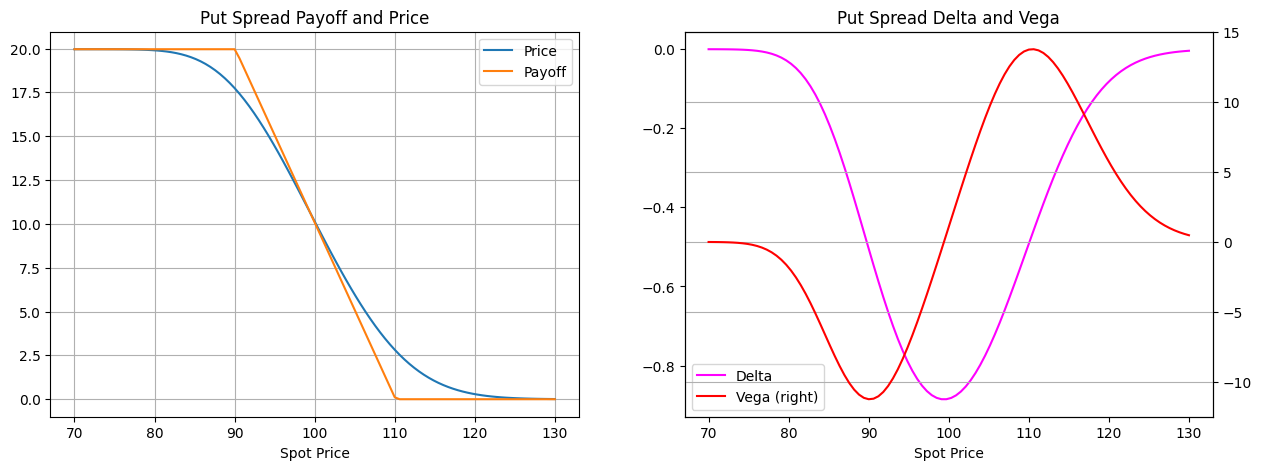

In [3]:
K1 = 90
K2 = 110
q = 0.03
r = 0.02
ivol = 0.20
model = Black(ivol)
T = 0.1
DF = np.exp(-r*T)
DivF = np.exp(-q*T)
spots = np.linspace(70,130,100)
forwards = [s*DivF/DF for s in spots]
#--------------------------------------------------------------------------------------
payoff1 = [model.value(f, K1, 1e-99, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
payoff2 = [model.value(f, K2, 1e-99, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
p1 = [model.value(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
p2 = [model.value(f, K2, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
d1 = [model.delta(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
d2 = [model.delta(f, K2, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
v1 = [model.vega(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
v2 = [model.vega(f, K2, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
payoff = [two - one for one, two in zip(payoff1, payoff2)]
p = [two - one for one, two in zip(p1, p2)]
d = [two - one for one, two in zip(d1, d2)]
v = [two - one for one, two in zip(v1, v2)]
output = np.array([spots, payoff, p, d, v])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['Spot Price', 'Payoff', 'Price', 'Delta', 'Vega'])  
df = df.set_index('Spot Price')
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Put Spread Payoff and Price')
df.plot(y=['Price', 'Payoff'], ax=axes[0], grid=True, style='-')
axes[1].set_title('Put Spread Delta and Vega')
df.plot(y=['Delta', 'Vega'], secondary_y=['Vega'], ax=axes[1], grid=True, style='-', color=['magenta', 'red'])
#fig.savefig("L6_PutSpread.png")

### Straddle

<Axes: title={'center': 'Straddle Delta and Vega'}, xlabel='Spot Price'>

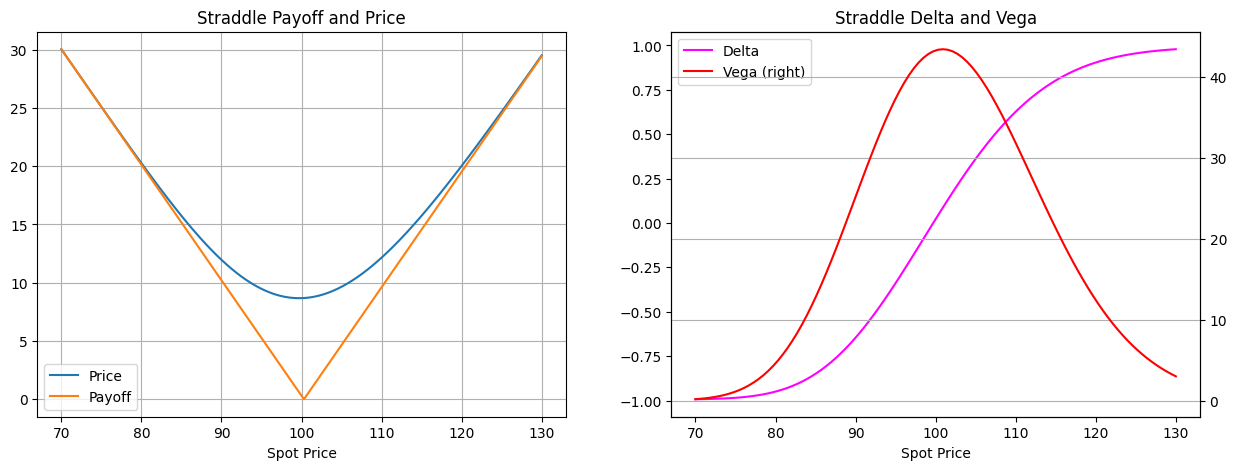

In [4]:
K = 100
q = 0.03
r = 0.02
ivol = 0.20
model = Black(ivol)
T = 0.3
DF = np.exp(-r*T)
DivF = np.exp(-q*T)
spots = np.linspace(70,130,100)
forwards = [s*DivF/DF for s in spots]
#--------------------------------------------------------------------------------------
payoff1 = [model.value(f, K, 1e-99, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
payoff2 = [model.value(f, K, 1e-99, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
p1 = [model.value(f, K, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
p2 = [model.value(f, K, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
d1 = [model.delta(f, K, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
d2 = [model.delta(f, K, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
v1 = [model.vega(f, K, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
v2 = [model.vega(f, K, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
payoff = [two + one for one, two in zip(payoff1, payoff2)]
p = [two + one for one, two in zip(p1, p2)]
d = [two + one for one, two in zip(d1, d2)]
v = [two + one for one, two in zip(v1, v2)]
output = np.array([spots, payoff, p, d, v])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['Spot Price', 'Payoff', 'Price', 'Delta', 'Vega'])  
df = df.set_index('Spot Price')
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Straddle Payoff and Price')
df.plot(y=['Price', 'Payoff'], ax=axes[0], grid=True, style='-')
axes[1].set_title('Straddle Delta and Vega')
df.plot(y=['Delta', 'Vega'], secondary_y=['Vega'], ax=axes[1], grid=True, style='-', color=['magenta', 'red'])
#fig.savefig("L6_Straddle.png")

### Strangle

<Axes: title={'center': 'Strangle Delta and Vega'}, xlabel='Spot Price'>

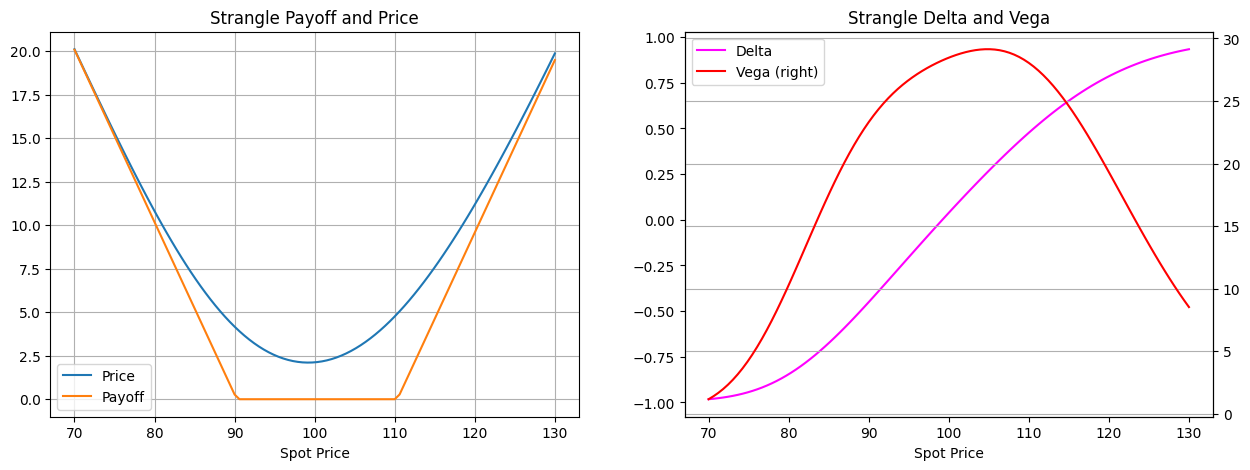

In [5]:
K1 = 90
K2 = 110
q = 0.03
r = 0.02
ivol = 0.20
model = Black(ivol)
T = 0.3
DF = np.exp(-r*T)
DivF = np.exp(-q*T)
spots = np.linspace(70,130,100)
forwards = [s*DivF/DF for s in spots]
#--------------------------------------------------------------------------------------
payoff1 = [model.value(f, K1, 1e-99, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
payoff2 = [model.value(f, K2, 1e-99, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
p1 = [model.value(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
p2 = [model.value(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
d1 = [model.delta(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
d2 = [model.delta(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
v1 = [model.vega(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
v2 = [model.vega(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
payoff = [two + one for one, two in zip(payoff1, payoff2)]
p = [two + one for one, two in zip(p1, p2)]
d = [two + one for one, two in zip(d1, d2)]
v = [two + one for one, two in zip(v1, v2)]
output = np.array([spots, payoff, p, d, v])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['Spot Price', 'Payoff', 'Price', 'Delta', 'Vega'])  
df = df.set_index('Spot Price')
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Strangle Payoff and Price')
df.plot(y=['Price', 'Payoff'], ax=axes[0], grid=True, style='-')
axes[1].set_title('Strangle Delta and Vega')
df.plot(y=['Delta', 'Vega'], secondary_y=['Vega'], ax=axes[1], grid=True, style='-', color=['magenta', 'red'])
#fig.savefig("L6_Strangle.png")

### Bullish Risk Reversal

<Axes: title={'center': 'Bullish RR Delta and Vega'}, xlabel='Spot Price'>

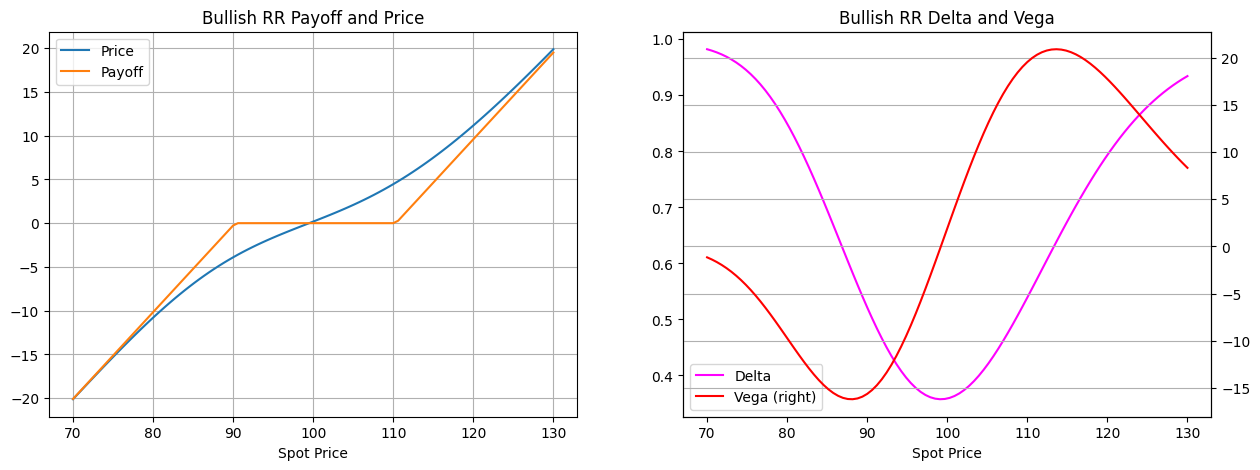

In [6]:
K1 = 90
K2 = 110
q = 0.03
r = 0.02
ivol = 0.20
model = Black(ivol)
T = 0.3
DF = np.exp(-r*T)
DivF = np.exp(-q*T)
spots = np.linspace(70,130,100)
forwards = [s*DivF/DF for s in spots]
#--------------------------------------------------------------------------------------
payoff1 = [model.value(f, K1, 1e-99, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
payoff2 = [model.value(f, K2, 1e-99, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
p1 = [model.value(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
p2 = [model.value(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
d1 = [model.delta(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
d2 = [model.delta(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
v1 = [model.vega(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
v2 = [model.vega(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
payoff = [two - one for one, two in zip(payoff1, payoff2)]
p = [two - one for one, two in zip(p1, p2)]
d = [two - one for one, two in zip(d1, d2)]
v = [two - one for one, two in zip(v1, v2)]
output = np.array([spots, payoff, p, d, v])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['Spot Price', 'Payoff', 'Price', 'Delta', 'Vega'])  
df = df.set_index('Spot Price')
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Bullish RR Payoff and Price')
df.plot(y=['Price', 'Payoff'], ax=axes[0], grid=True, style='-')
axes[1].set_title('Bullish RR Delta and Vega')
df.plot(y=['Delta', 'Vega'], secondary_y=['Vega'], ax=axes[1], grid=True, style='-', color=['magenta', 'red'])
#fig.savefig("L6_BullishRR.png")

### Bearish Risk Reversal

<Axes: title={'center': 'Bearish RR Delta and Vega'}, xlabel='Spot Price'>

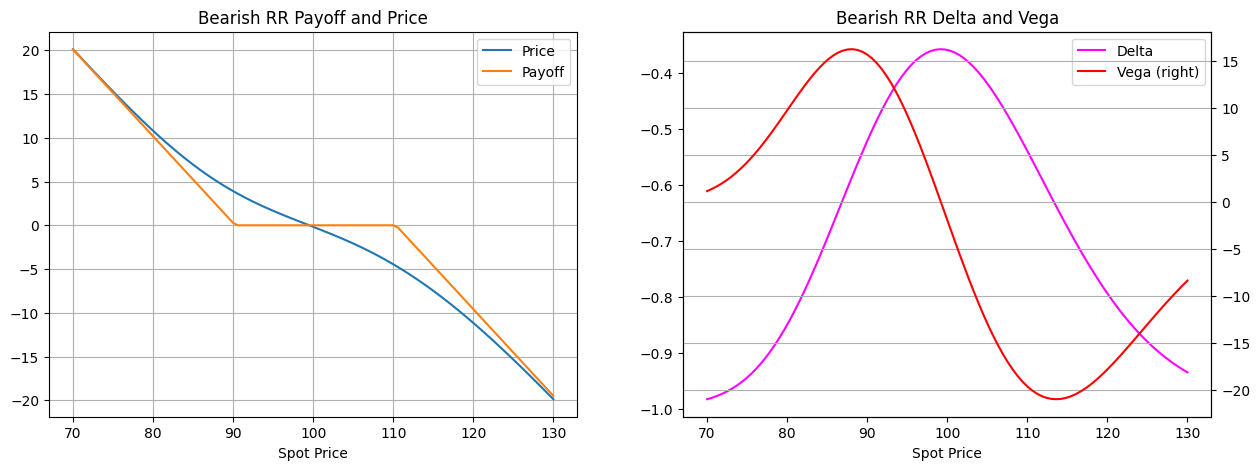

In [7]:
K1 = 90
K2 = 110
q = 0.03
r = 0.02
ivol = 0.20
model = Black(ivol)
T = 0.3
DF = np.exp(-r*T)
DivF = np.exp(-q*T)
spots = np.linspace(70,130,100)
forwards = [s*DivF/DF for s in spots]
#--------------------------------------------------------------------------------------
payoff1 = [model.value(f, K1, 1e-99, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
payoff2 = [model.value(f, K2, 1e-99, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
p1 = [model.value(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
p2 = [model.value(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
d1 = [model.delta(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
d2 = [model.delta(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
v1 = [model.vega(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
v2 = [model.vega(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
payoff = [one - two for one, two in zip(payoff1, payoff2)]
p = [one - two for one, two in zip(p1, p2)]
d = [one - two for one, two in zip(d1, d2)]
v = [one - two for one, two in zip(v1, v2)]
output = np.array([spots, payoff, p, d, v])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['Spot Price', 'Payoff', 'Price', 'Delta', 'Vega'])  
df = df.set_index('Spot Price')
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Bearish RR Payoff and Price')
df.plot(y=['Price', 'Payoff'], ax=axes[0], grid=True, style='-')
axes[1].set_title('Bearish RR Delta and Vega')
df.plot(y=['Delta', 'Vega'], secondary_y=['Vega'], ax=axes[1], grid=True, style='-', color=['magenta', 'red'])
#fig.savefig("L6_BearishRR.png")

### Call Ratio

<Axes: title={'center': 'Call Ratio 2x1 Delta and Vega'}, xlabel='Spot Price'>

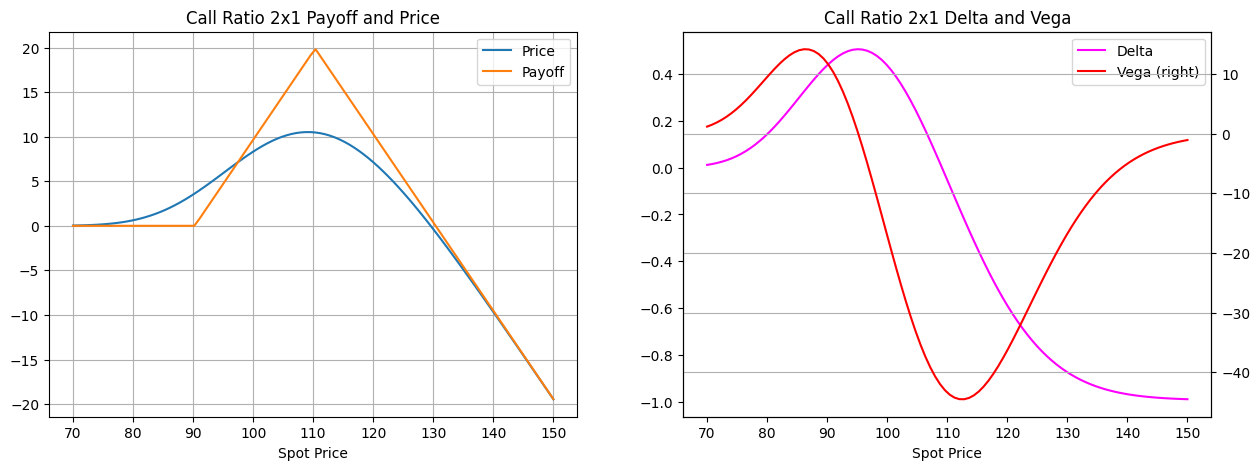

In [8]:
K1 = 90
K2 = 110
q = 0.03
r = 0.02
ivol = 0.20
model = Black(ivol)
T = 0.3
DF = np.exp(-r*T)
DivF = np.exp(-q*T)
spots = np.linspace(70,150,100)
forwards = [s*DivF/DF for s in spots]
#--------------------------------------------------------------------------------------
payoff1 = [model.value(f, K1, 1e-99, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
payoff2 = [model.value(f, K2, 1e-99, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
p1 = [model.value(f, K1, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
p2 = [model.value(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
d1 = [model.delta(f, K1, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
d2 = [model.delta(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
v1 = [model.vega(f, K1, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
v2 = [model.vega(f, K2, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
payoff = [one - 2*two for one, two in zip(payoff1, payoff2)]
p = [one - 2*two for one, two in zip(p1, p2)]
d = [one - 2*two for one, two in zip(d1, d2)]
v = [one - 2*two for one, two in zip(v1, v2)]
output = np.array([spots, payoff, p, d, v])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['Spot Price', 'Payoff', 'Price', 'Delta', 'Vega']) 
df = df.set_index('Spot Price')
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Call Ratio 2x1 Payoff and Price')
df.plot(y=['Price', 'Payoff'], ax=axes[0], grid=True, style='-')
axes[1].set_title('Call Ratio 2x1 Delta and Vega')
df.plot(y=['Delta', 'Vega'], secondary_y=['Vega'], ax=axes[1], grid=True, style='-', color=['magenta', 'red'])
#fig.savefig("L6_CallRatio.png")

### Put Ratio

<Axes: title={'center': 'Put Ratio 2x1 Delta and Vega'}, xlabel='Spot Price'>

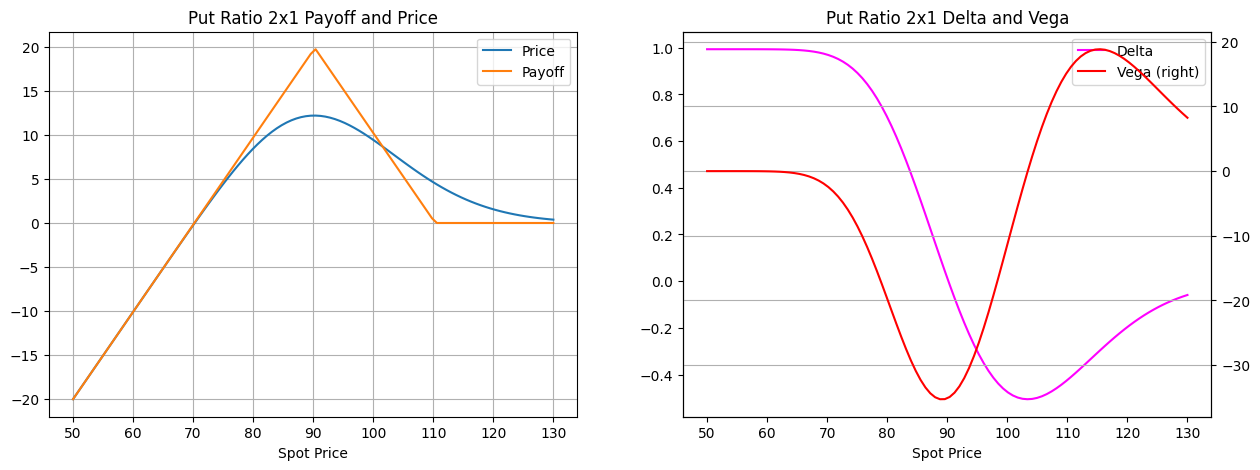

In [9]:
K1 = 90
K2 = 110
q = 0.03
r = 0.02
ivol = 0.20
model = Black(ivol)
T = 0.3
DF = np.exp(-r*T)
DivF = np.exp(-q*T)
spots = np.linspace(50,130,100)
forwards = [s*DivF/DF for s in spots]
#--------------------------------------------------------------------------------------
payoff1 = [model.value(f, K1, 1e-99, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
payoff2 = [model.value(f, K2, 1e-99, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
p1 = [model.value(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
p2 = [model.value(f, K2, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
d1 = [model.delta(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
d2 = [model.delta(f, K2, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
v1 = [model.vega(f, K1, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
v2 = [model.vega(f, K2, T, DF, OptionTypes.EUROPEAN_PUT) for f in forwards]
payoff = [two - 2*one for one, two in zip(payoff1, payoff2)]
p = [two - 2*one for one, two in zip(p1, p2)]
d = [two - 2*one for one, two in zip(d1, d2)]
v = [two - 2*one for one, two in zip(v1, v2)]
output = np.array([spots, payoff, p, d, v])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['Spot Price', 'Payoff', 'Price', 'Delta', 'Vega'])  
df = df.set_index('Spot Price')
#--------------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Put Ratio 2x1 Payoff and Price')
df.plot(y=['Price', 'Payoff'], ax=axes[0], grid=True, style='-')
axes[1].set_title('Put Ratio 2x1 Delta and Vega')
df.plot(y=['Delta', 'Vega'], secondary_y=['Vega'], ax=axes[1], grid=True, style='-', color=['magenta', 'red'])
#fig.savefig("L6_PutRatio.png")